# Diabetes Patients  

## About the Dataset:  

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases and it's also used in the article by Das M, Bhattacharyya G, Gong R. [*Determinants of gestational diabetes pedigree function for pima Indian females*](https://openventio.org/wp-content/uploads/Determinants-of-Gestational-Diabetes-Pedigree-Function-for-Pima-Indian-Females-IMOJ-6-121.pdf). Intern Med Open J. 2022; 6(1): 9-13, which we used to complement the information about the data.    
The objective of the dataset is to diagnostically predict whether a female patient has diabetes based on certain diagnostic measurements included in the dataset.  
The dataset contains the following variables:

- Pregnancies: number of pregnancies of the patients. The [*CDC*](https://www.cdc.gov/diabetes/basics/risk-factors.html) reports that gestational diabetes is common in women who are overweight, over 25 years old, and have a family history of type 2 diabetes. It usually goes away after pregnancy but can increase the chances of developing type 2 diabetes in the future;
- Glucose: glucose or sugar levels in the bloodstream after a glucose tolerance test. According to the [*CDC*](https://www.cdc.gov/diabetes/basics/getting-tested.html), glucose levels between 140 – 199 mg/dL indicates prediabetes, and greater than 200 mg/dL indicates diabetes;
- BloodPressure: the diastolic values of blood pressure refers to the pressure of blood in the arteries when the heart is at rest between beats. Diabetes is a common [risk factor](https://www.cdc.gov/bloodpressure/about.htm#whatdo) for high blood pressure, and if the diastolic measurement is greater than 80 mmHg, it indicates that the person is at risk of developing it;
- SkinThickness: measurement of the triceps skin fold thickness. Diabetic patients tend to have [thinner skin](https://www.researchgate.net/publication/343920970_Skin_Thickness_can_Predict_the_Progress_of_Diabetes_Type_2_A_New_Medical_Hypothesis) than non-diabetic; 
- Insulin: serum insulin levels in the bloodstream 2-hours after ingestiton of glucose. [Usually](https://www.cdc.gov/diabetes/basics/insulin-resistance.html)insulin and glucose levels work together to regulate blood sugar levels. When there are high levels of glucose in the blood, the pancreas releases insulin to help the cells absorb it. In type 2 diabetes, cells become insulin resistant and cannot absorb sugar the blood, causing the pancreas to release more and more insulin, that builds up with the glucose in the bloodstream. For people with type 1 diabetes, the pancreas doesn't produce enough insulin, which leads to high levels of sugar in the bloodstream;
- BMI: or Body Mass Index, is calculated from the person's weight and height. According to the [*CDC*](https://www.cdc.gov/diabetes/library/features/diabetes-causes.html#:~:text=Your%20Body%20Mass%20Index%20Matters&text=Most%20health%20professionals%20rely%20on,tested%20for%20type%202%20diabetes.), it's used to determined if patients are overweighted (greater than 25) or obese (greater than 30). Overweight is an important risk factor for type 2 diabetes;
- DiabetesPedigreeFunction: [estimates](https://openventio.org/wp-content/uploads/Determinants-of-Gestational-Diabetes-Pedigree-Function-for-Pima-Indian-Females-IMOJ-6-121.pdf), based on a person's age and family history, the odds of them developing diabetes;
- Age: in years, varying between 21 and 81;
- Outcome: if the patients have diabetes or not.

## Analysis:   



## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

## Load & Explore data

In [2]:
data = pd.read_csv('D:\Projects\MeriSkill\Project 2/diabetes.csv')
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
data.duplicated().sum()

0

In [4]:
# Check for null values 
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# To show basic info about datatype
data.info()
shape = data.shape
print(f'\n Number of Rows = {shape[0]}\n Number of columns = {shape[1]} ')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

 Number of Rows = 768
 Number of columns = 9 


In [6]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

## Exploratory Analysis

In [7]:
data.rename(columns={'Outcome':'Status'}, inplace=True)
data['Status'] = data['Status'].replace({0: 'Non-Diabetic', 1: 'Diabetic'})
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age        Status  
0                     0.627   50      Diabetic  
1                     0.351   31  Non-Diabetic  
2                     0.672   32      Diabetic  
3                     0.167   21  Non-Diabetic  
4                     2.288   33      Diabetic

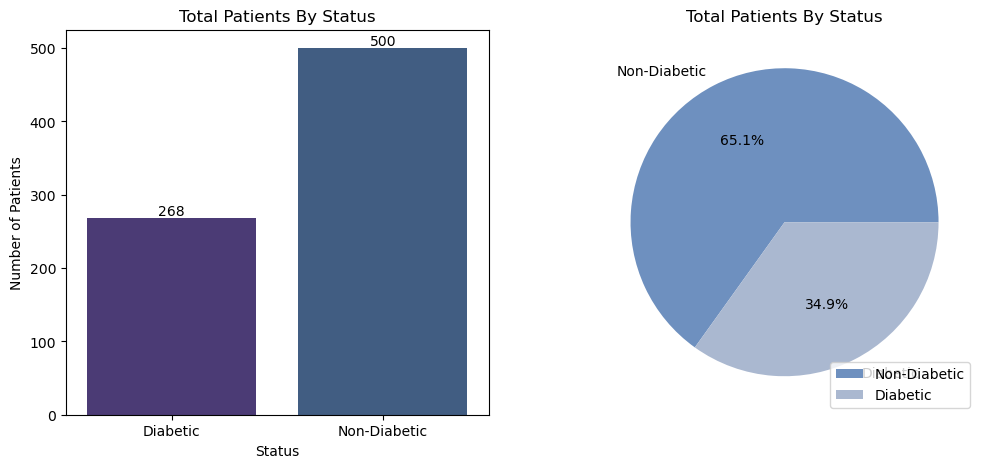

In [8]:
fig,ax=plt.subplots(1,2, figsize=(12,5))

sns.countplot(x=data['Status'],palette = sns.color_palette('viridis'), ax=ax[0])
ax[0].set_xlabel('Status')
ax[0].set_ylabel('Number of Patients')
ax[0].set_title('Total Patients By Status')
for p in ax[0].patches:
    ax[0].annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
patient_count = data['Status'].value_counts()
ax[1].pie(patient_count, labels=patient_count.index, autopct='%1.1f%%', colors=sns.color_palette('vlag'))
ax[1].legend(labels=patient_count.index)
ax[1].set_title('Total Patients By Status')

plt.show()

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data[data['Status']=='Diabetic']['Age'],bins=40, kde=True, color = "m", ax=ax[0])
ax[0].set_title('Distribution of Diabetic Patients by Age')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('No. of Patients')

ax[1].bar(data['Status'], data['Pregnancies'], color='#CC6677')
ax[1].set_title('Number of Pregnancies Reported by Diabetic and Non-Diabetic Patients')
ax[1].set_xticklabels(['Non-Diabetic', 'Diabetic']) 

plt.show()

* Most diabetic women are between the ages of 21 and 30, while there is another peak of patients at 45, which may [indicate](https://www.cdc.gov/diabetes/basics/risk-factors.html) a prediabetes and/or type 2 diabetes diagnosis.  
* Diabetes occurs more frequently in women who had more pregnancies reported

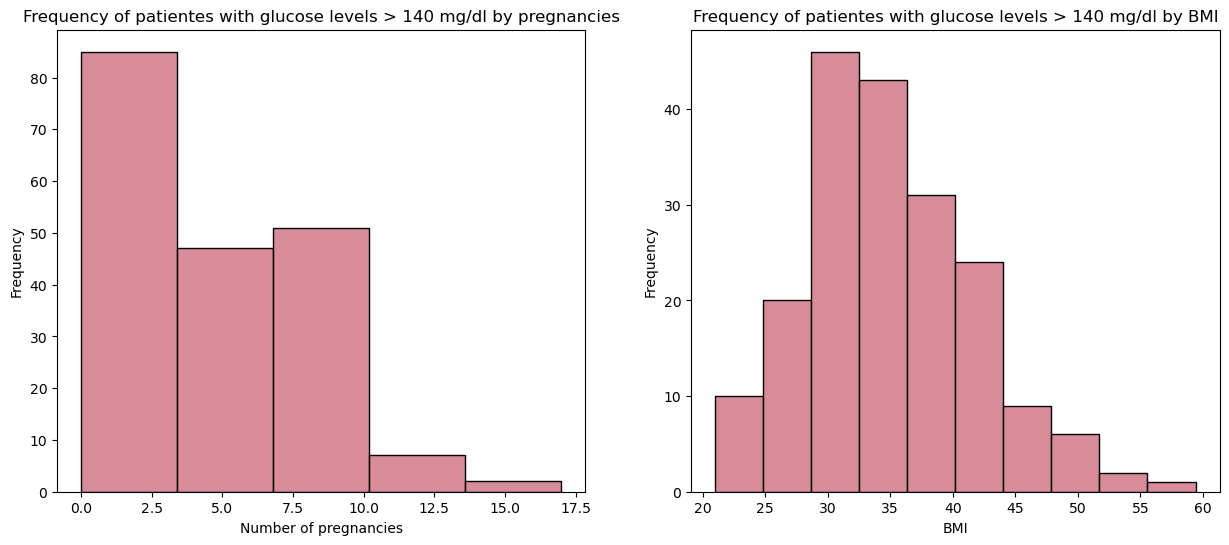

In [10]:
fig,ax=plt.subplots(1,2, figsize=(15,6))

sns.histplot(data[data['Glucose']>140]['Pregnancies'], bins=5, color='#CC6677',ax=ax[0])
ax[0].set_title('Frequency of patientes with glucose levels > 140 mg/dl by pregnancies')
ax[0].set_xlabel('Number of pregnancies')
ax[0].set_ylabel('Frequency')

sns.histplot(data[data['Glucose']>140]['BMI'], bins=10, color='#CC6677',ax=ax[1])
ax[1].set_title('Frequency of patientes with glucose levels > 140 mg/dl by BMI')
ax[1].set_xlabel('BMI')
ax[1].set_ylabel('Frequency')

plt.show()

* Women who reported having none to 3 pregnancies were the ones with most glucose levels greater than 140 mg/dl, as the histogram below shows.
* The dataset also reveals that women with BMI greater than 30 were more frequently experiencing glucose levels higher than 140 mg/dl.

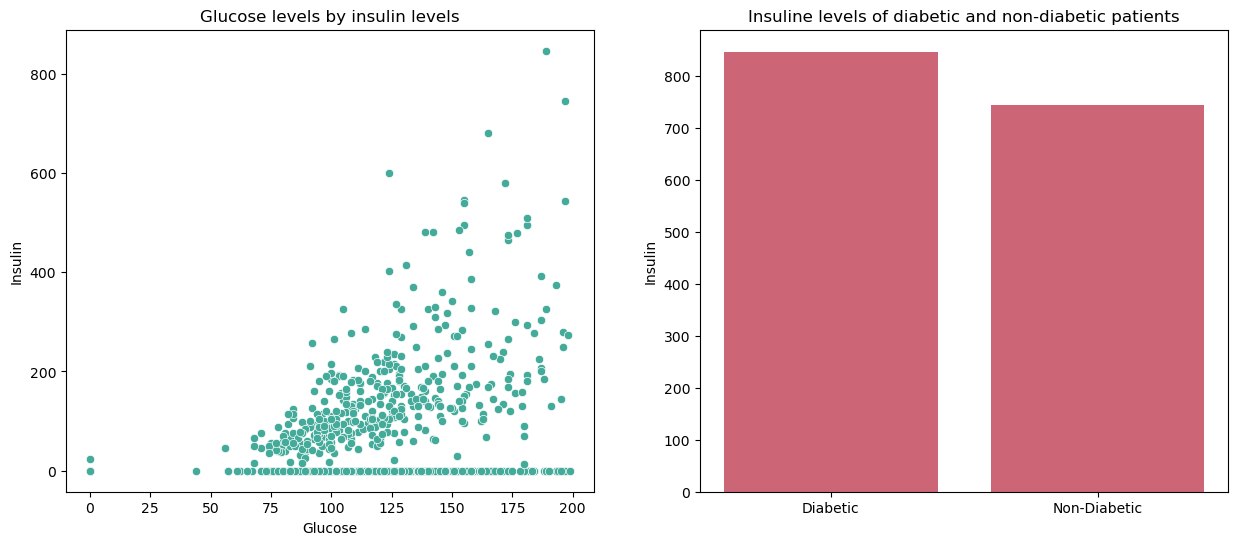

In [11]:
fig,ax=plt.subplots(1,2, figsize=(15,6))

sns.scatterplot(x=data['Glucose'], y=data['Insulin'], color='#44AA99',ax=ax[0])
ax[0].set_title('Glucose levels by insulin levels')

plt.bar(data['Status'], data['Insulin'],color='#CC6677')
ax[1].set_title('Insuline levels of diabetic and non-diabetic patients')
ax[1].set_ylabel('Insulin')

plt.show()

* The data confirms that when the glucose levels rise in the bloodstream so does the insulin. However, the insulin levels reach up to 800 µU/ml while the maximum glucose levels are 199 mg/dL. This finding suggests the possibility of a condition known as [*hyperinsulinemia*](https://my.clevelandclinic.org/health/diseases/24178-hyperinsulinemia), which is associated with insulin resistance and can lead to the development of type 2 diabetes.
* Diabetic women were also prone to higher insulin levels in their bloodstream.

## Data Before Treatment

In [12]:
# Data Before Treatment (DBT)
DBT = data.copy()
DBT.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age        Status  
0                     0.627   50      Diabetic  
1                     0.351   31  Non-Diabetic  
2                     0.672   32      Diabetic  
3                     0.167   21  Non-Diabetic  
4                     2.288   33      Diabetic

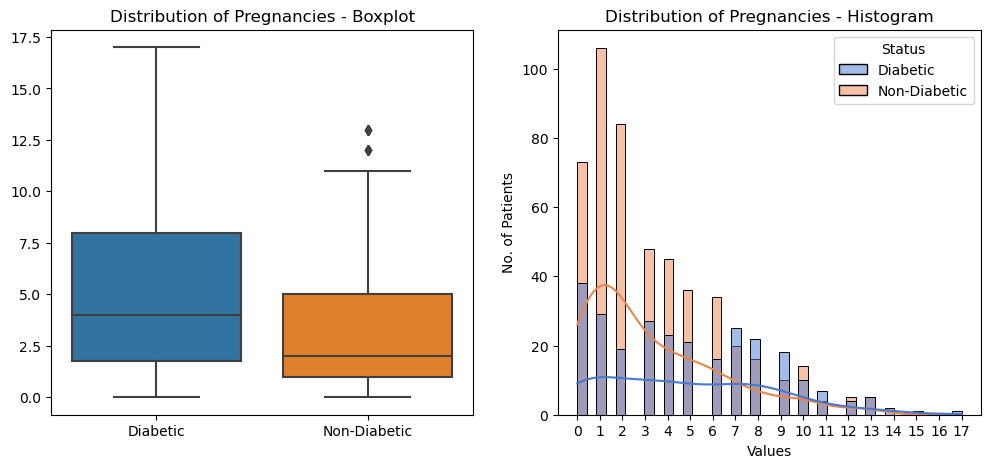

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot
sns.boxplot(y=DBT['Pregnancies'],x=DBT['Status'], fliersize=5, ax=ax[0])
ax[0].set_title('Distribution of Pregnancies - Boxplot')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

# Histogram
sns.histplot(x=DBT['Pregnancies'], bins=40,kde=True, hue=DBT['Status'], legend=True, palette='muted', ax=ax[1])
ax[1].set_xticks(range(int(min(DBT['Pregnancies'])), int(max(DBT['Pregnancies'])) + 1))
ax[1].set_title('Distribution of Pregnancies - Histogram')
ax[1].set_xlabel('Values')
ax[1].set_ylabel('No. of Patients')

plt.show()

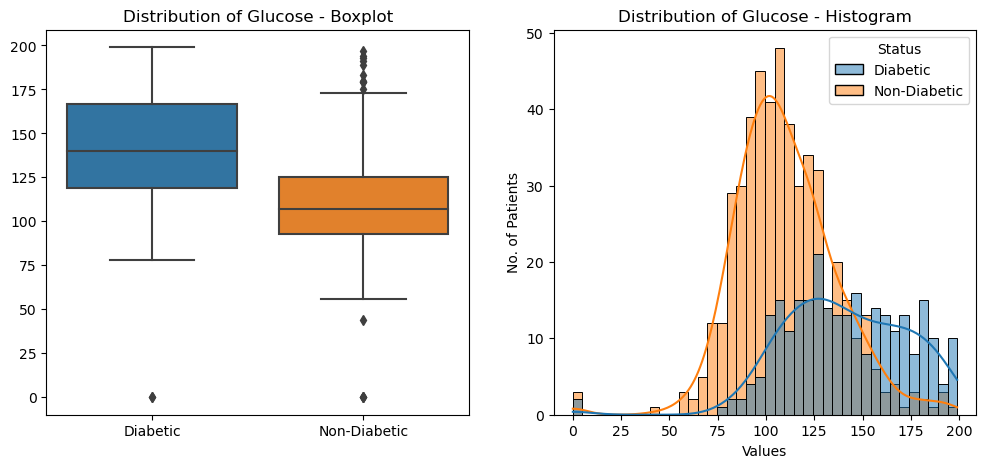

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot
sns.boxplot(y=DBT['Glucose'],x=DBT['Status'], fliersize=5, ax=ax[0])
ax[0].set_title('Distribution of Glucose - Boxplot')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

# Histogram
sns.histplot(x=DBT['Glucose'], bins=40, kde=True, hue=DBT['Status'],legend=True, color = "m", ax=ax[1])
ax[1].set_title('Distribution of Glucose - Histogram')
ax[1].set_xlabel('Values')
ax[1].set_ylabel('No. of Patients')

plt.show()

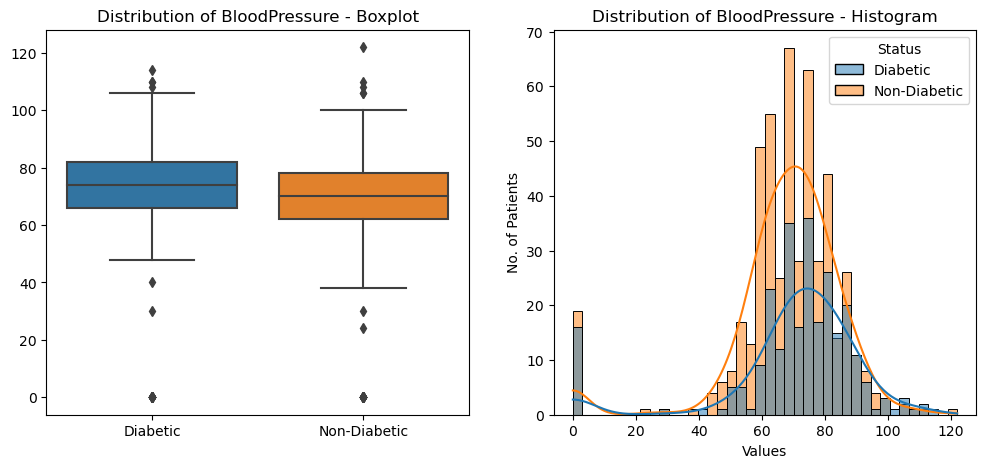

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot
sns.boxplot(y=DBT['BloodPressure'],x=DBT['Status'], fliersize=5, ax=ax[0])
ax[0].set_title('Distribution of BloodPressure - Boxplot')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

# Histogram
sns.histplot(x=DBT['BloodPressure'], bins=40, kde=True, hue=DBT['Status'],legend=True, color = "m", ax=ax[1])
ax[1].set_title('Distribution of BloodPressure - Histogram')
ax[1].set_xlabel('Values')
ax[1].set_ylabel('No. of Patients')

plt.show()

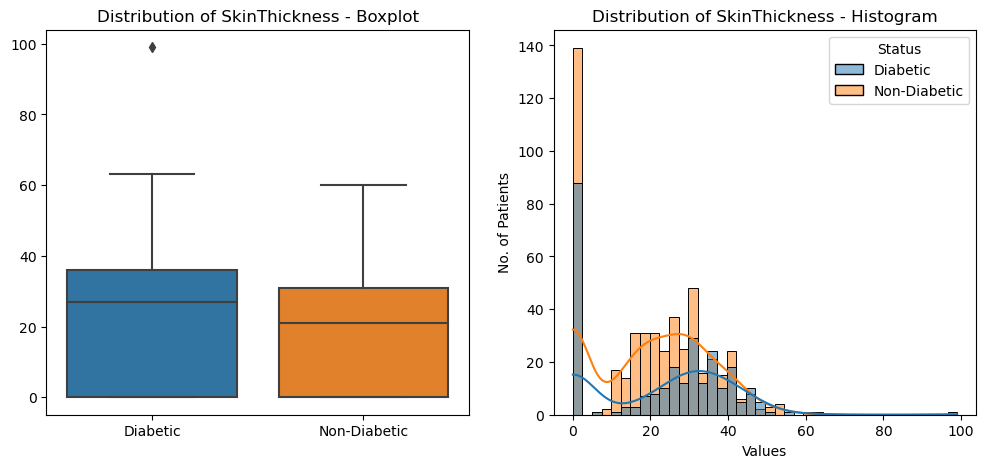

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot
sns.boxplot(y=DBT['SkinThickness'],x=DBT['Status'], fliersize=5, ax=ax[0])
ax[0].set_title('Distribution of SkinThickness - Boxplot')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

# Histogram
sns.histplot(x=DBT['SkinThickness'], bins=40, kde=True, hue=DBT['Status'],legend=True, color = "m", ax=ax[1])
ax[1].set_title('Distribution of SkinThickness - Histogram')
ax[1].set_xlabel('Values')
ax[1].set_ylabel('No. of Patients')

plt.show()

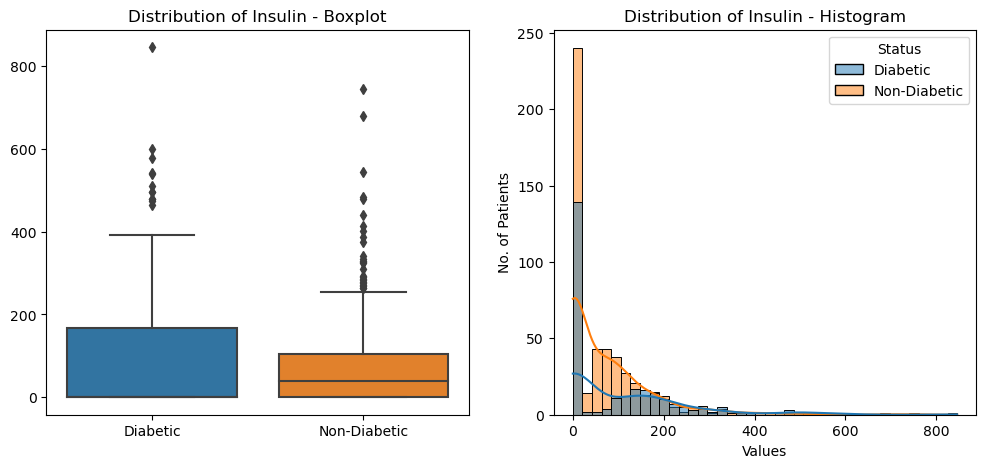

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot
sns.boxplot(y=DBT['Insulin'],x=DBT['Status'], fliersize=5, ax=ax[0])
ax[0].set_title('Distribution of Insulin - Boxplot')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

# Histogram
sns.histplot(x=DBT['Insulin'],bins=40, kde=True, hue=DBT['Status'],legend=True, color = "m", ax=ax[1])
ax[1].set_title('Distribution of Insulin - Histogram')
ax[1].set_xlabel('Values')
ax[1].set_ylabel('No. of Patients')

plt.show()

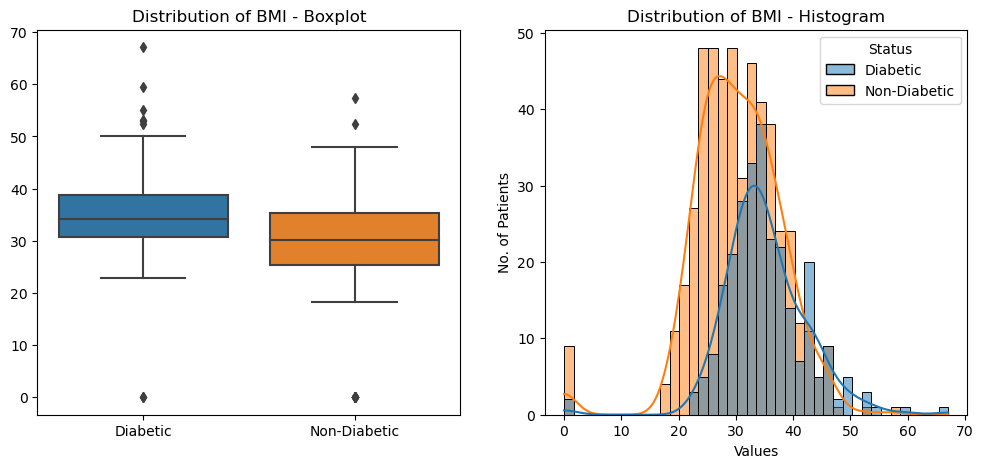

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot
sns.boxplot(y=DBT['BMI'],x=DBT['Status'], fliersize=5, ax=ax[0])
ax[0].set_title('Distribution of BMI - Boxplot')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

# Histogram
sns.histplot(x=DBT['BMI'],bins=40, kde=True, hue=DBT['Status'],legend=True, color = "m", ax=ax[1])
ax[1].set_title('Distribution of BMI - Histogram')
ax[1].set_xlabel('Values')
ax[1].set_ylabel('No. of Patients')

plt.show()

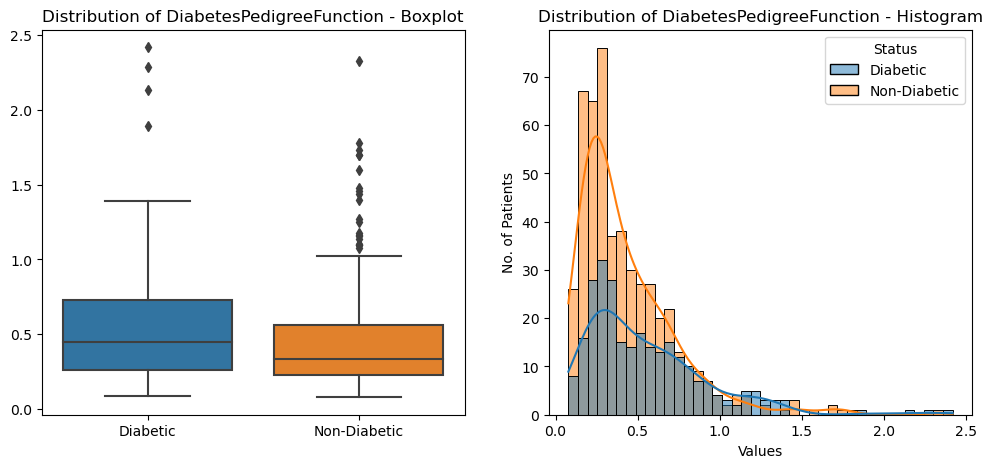

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot
sns.boxplot(y=DBT['DiabetesPedigreeFunction'],x=DBT['Status'], fliersize=5, ax=ax[0])
ax[0].set_title('Distribution of DiabetesPedigreeFunction - Boxplot')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

# Histogram
sns.histplot(x=DBT['DiabetesPedigreeFunction'],bins=40, kde=True, hue=DBT['Status'],legend=True, color = "m", ax=ax[1])
ax[1].set_title('Distribution of DiabetesPedigreeFunction - Histogram')
ax[1].set_xlabel('Values')
ax[1].set_ylabel('No. of Patients')

plt.show()

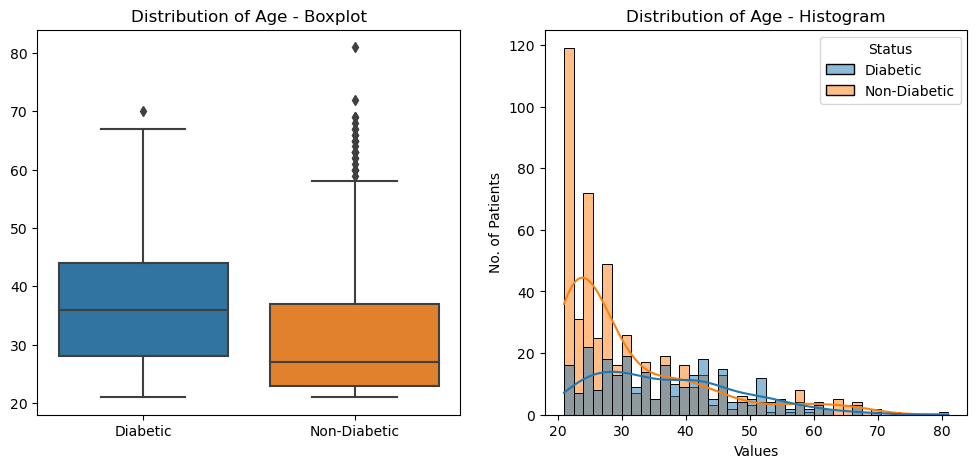

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot
sns.boxplot(y=DBT['Age'],x=DBT['Status'], fliersize=5, ax=ax[0])
ax[0].set_title('Distribution of Age - Boxplot')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

# Histogram
sns.histplot(x=DBT['Age'],bins=40, kde=True, hue=DBT['Status'],legend=True, color = "m", ax=ax[1])
ax[1].set_title('Distribution of Age - Histogram')
ax[1].set_xlabel('Values')
ax[1].set_ylabel('No. of Patients')

plt.show()

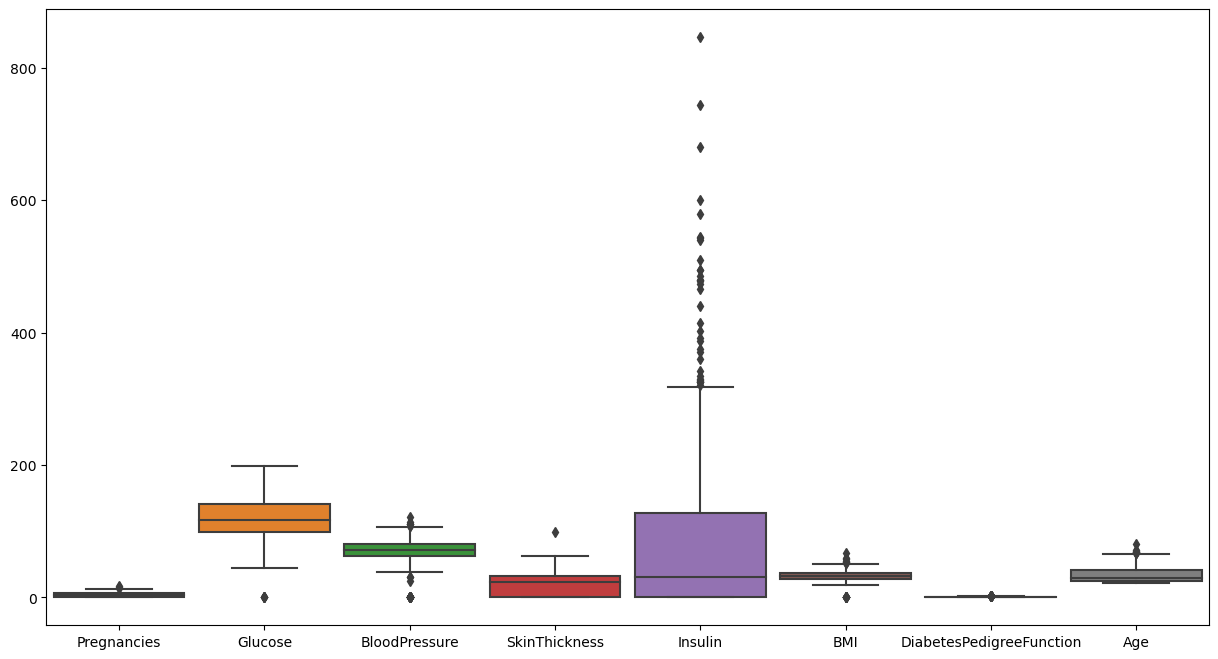

In [21]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=DBT, width=0.9, ax=ax, fliersize=5)
plt.show()

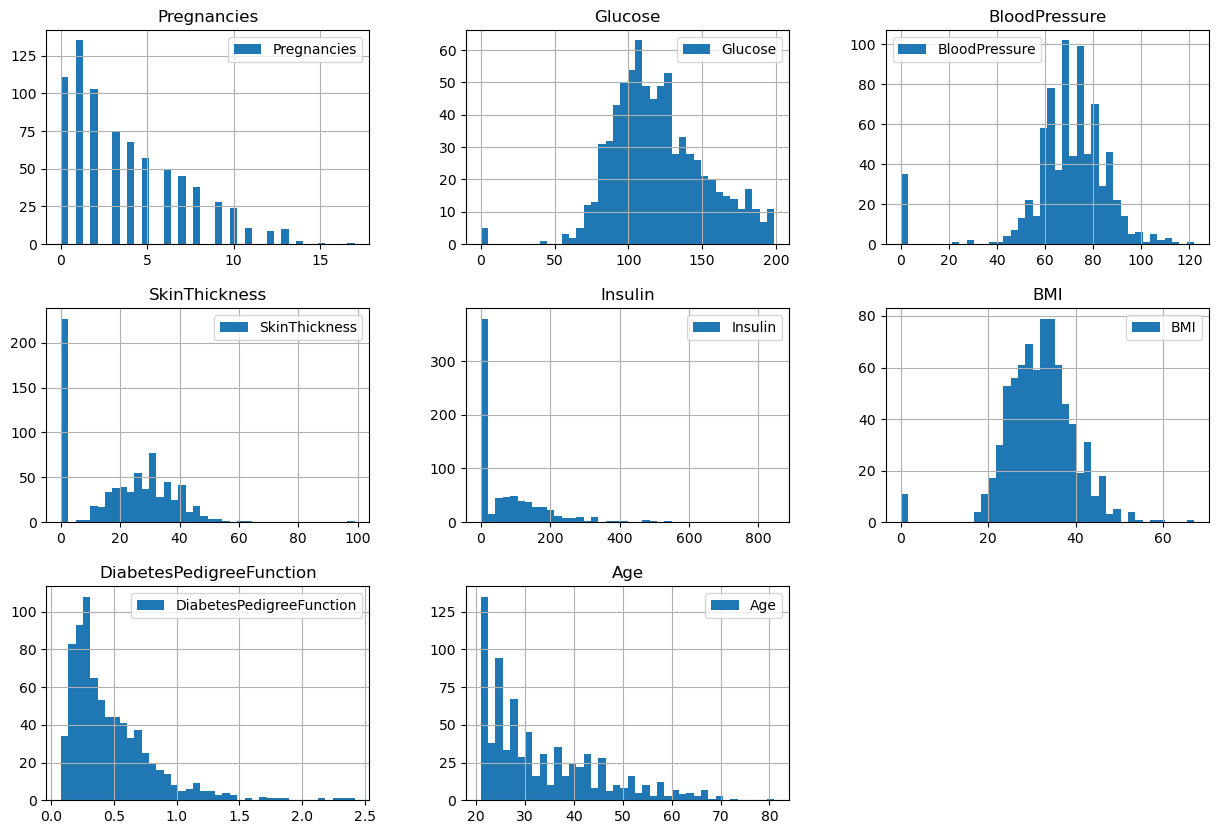

In [22]:
DBT.hist(bins=40, figsize=(15,10), legend=True)
plt.show()

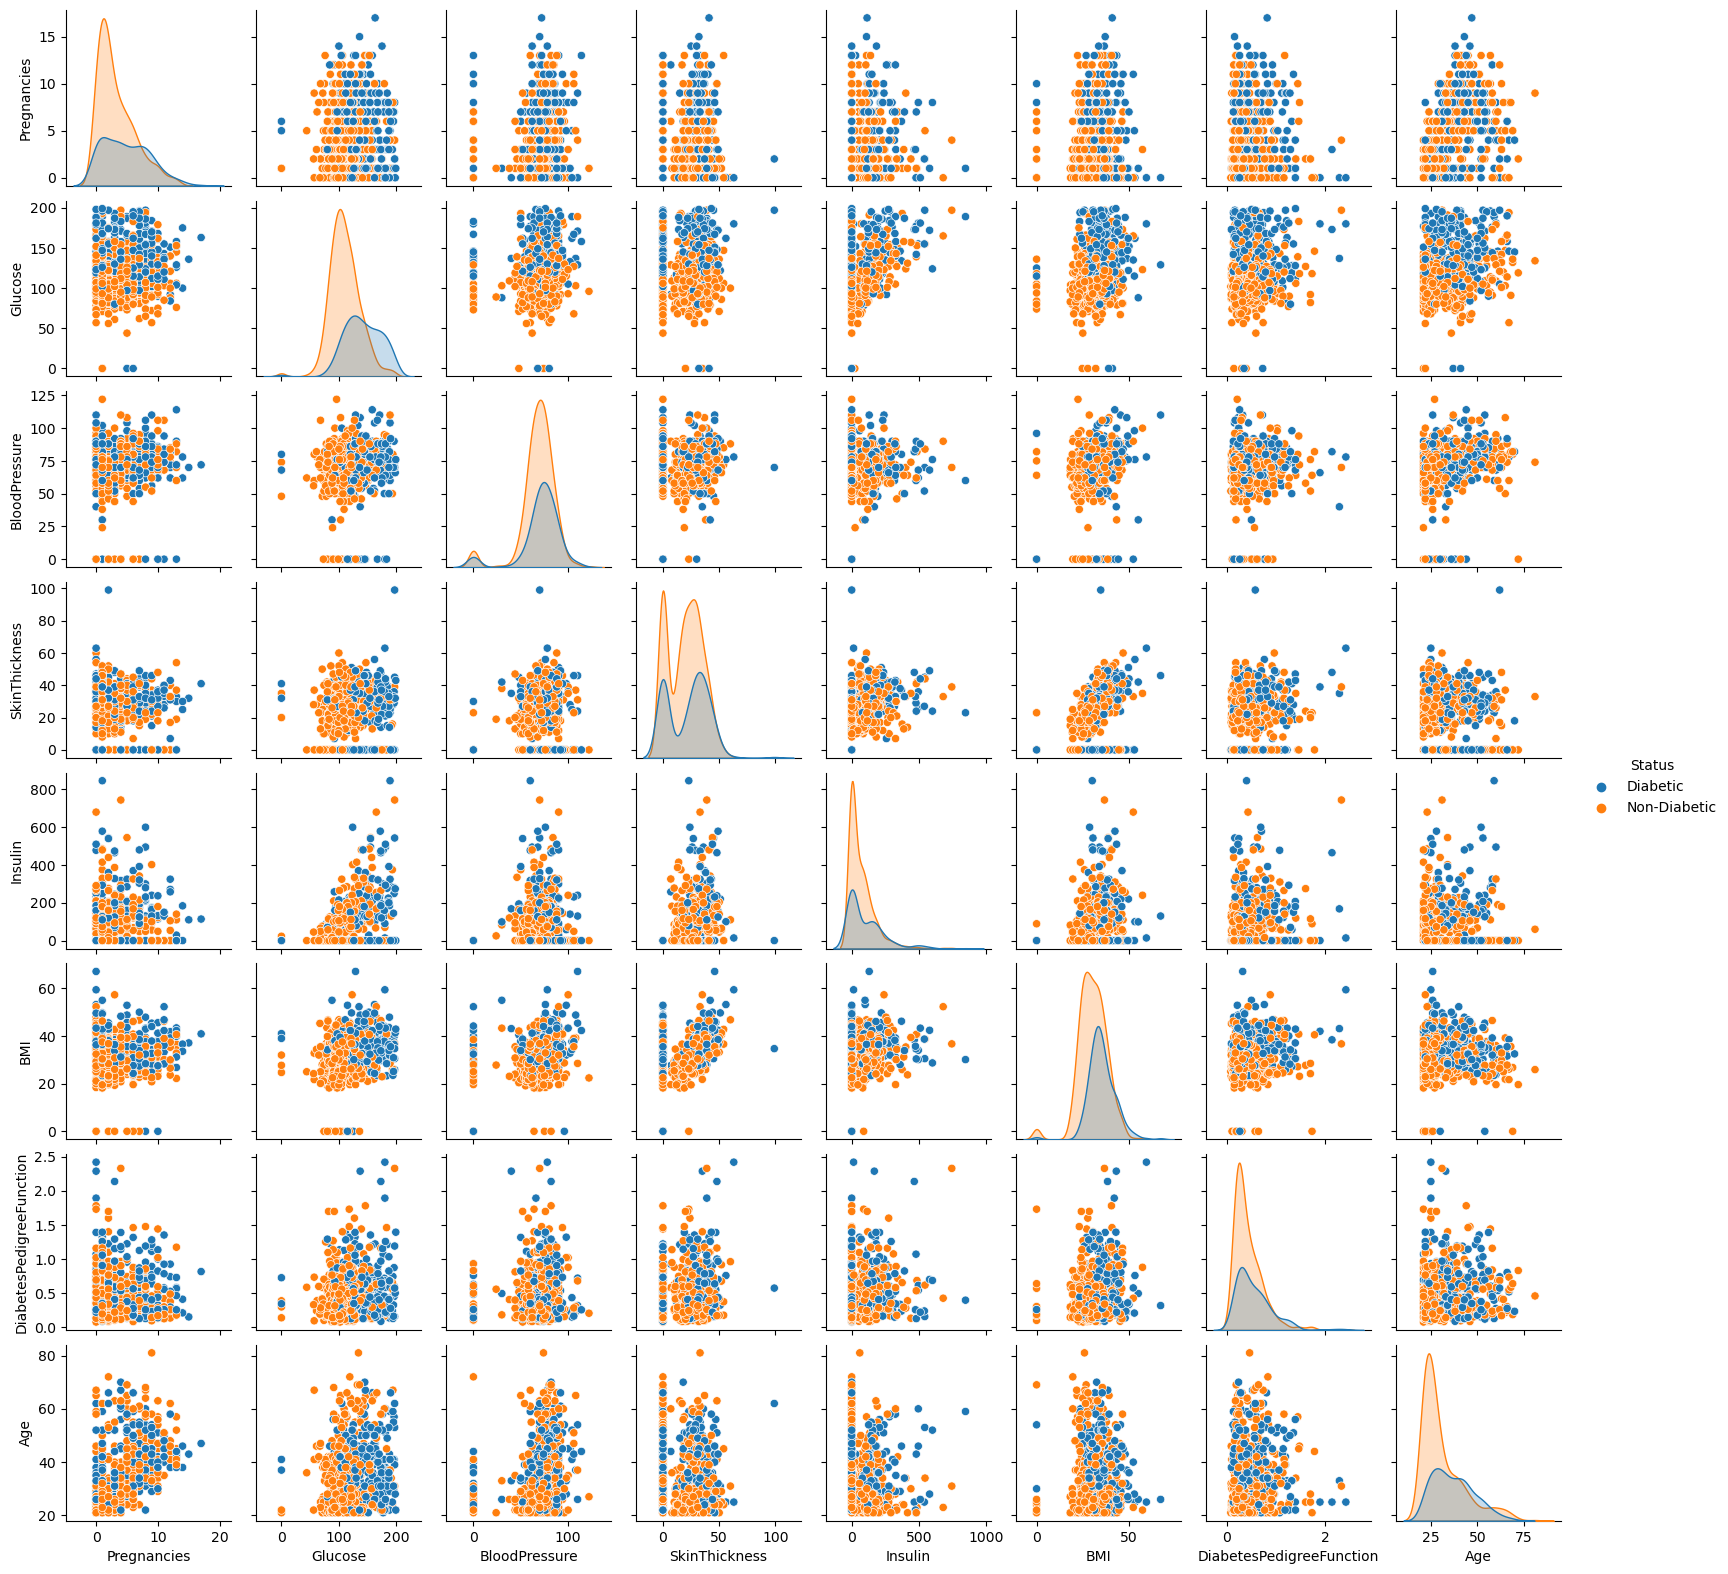

In [23]:
sns.pairplot(data=DBT,height=2, aspect=1, hue='Status')
plt.show()

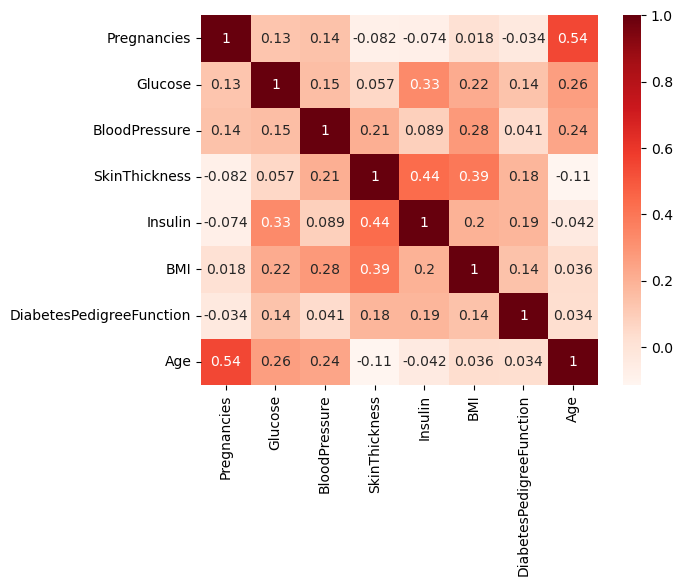

In [24]:
sns.heatmap(DBT.corr(), annot=True, cmap='Reds')
plt.show()

## Outliers & Zero values Detection & Treatment

### Zeros detection & treatment

In [25]:
TD = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [26]:
for column in TD:
    count = (DBT[column]==0).sum()
    print ('No. of Zeros count in column', column, 'is: ', count)

No. of Zeros count in column Pregnancies is:  111
No. of Zeros count in column Glucose is:  5
No. of Zeros count in column BloodPressure is:  35
No. of Zeros count in column SkinThickness is:  227
No. of Zeros count in column Insulin is:  374
No. of Zeros count in column BMI is:  11
No. of Zeros count in column DiabetesPedigreeFunction is:  0
No. of Zeros count in column Age is:  0


In [27]:
for column_name in TD:
    mean = DBT[column_name].mean()
    DBT[column_name] = DBT[column_name].replace(0,mean)
    
    
for column in TD:
    count = (DBT[column]==0).sum()
    print ('No. of Zeros count in column', column, 'is: ', count)

No. of Zeros count in column Pregnancies is:  0
No. of Zeros count in column Glucose is:  0
No. of Zeros count in column BloodPressure is:  0
No. of Zeros count in column SkinThickness is:  0
No. of Zeros count in column Insulin is:  0
No. of Zeros count in column BMI is:  0
No. of Zeros count in column DiabetesPedigreeFunction is:  0
No. of Zeros count in column Age is:  0


### Outliers detection & treatment

In [28]:
def find_outliers_IQR(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    IQR = q3 - q1
    outliers = column[((column < (q1 - 1.5 * IQR)) | (column > (q3 + 1.5 * IQR)))]
    return outliers

for column_name in TD:
    outliers = find_outliers_IQR(DBT[column_name])
    print('no.of Outliers in column', column_name, 'is:', str(len(outliers)))

no.of Outliers in column Pregnancies is: 14
no.of Outliers in column Glucose is: 0
no.of Outliers in column BloodPressure is: 14
no.of Outliers in column SkinThickness is: 12
no.of Outliers in column Insulin is: 89
no.of Outliers in column BMI is: 8
no.of Outliers in column DiabetesPedigreeFunction is: 29
no.of Outliers in column Age is: 9


In [29]:
for col in TD:
    q1 = DBT[col].describe()['25%']
    q3 = DBT[col].describe()['75%']
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

    DBT[col] = np.where(DBT[col] < lower_bound, lower_bound, DBT[col])
    DBT[col] = np.where(DBT[col] > upper_bound, upper_bound, DBT[col])
    
for column_name in TD:
    outliers = find_outliers_IQR(DBT[column_name])
    print('no.of Outliers in column', column_name, 'is:', str(len(outliers)))

no.of Outliers in column Pregnancies is: 0
no.of Outliers in column Glucose is: 0
no.of Outliers in column BloodPressure is: 0
no.of Outliers in column SkinThickness is: 0
no.of Outliers in column Insulin is: 0
no.of Outliers in column BMI is: 0
no.of Outliers in column DiabetesPedigreeFunction is: 0
no.of Outliers in column Age is: 0


## Data After Treatment

In [30]:
# Data After Treatment
DAT = DBT.copy()
DAT.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0     6.000000    148.0           72.0      35.000000   79.799479  33.6   
1     1.000000     85.0           66.0      29.000000   79.799479  26.6   
2     8.000000    183.0           64.0      20.536458   79.799479  23.3   
3     1.000000     89.0           66.0      23.000000   94.000000  28.1   
4     3.845052    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction   Age        Status  
0                     0.627  50.0      Diabetic  
1                     0.351  31.0  Non-Diabetic  
2                     0.672  32.0      Diabetic  
3                     0.167  21.0  Non-Diabetic  
4                     1.200  33.0      Diabetic

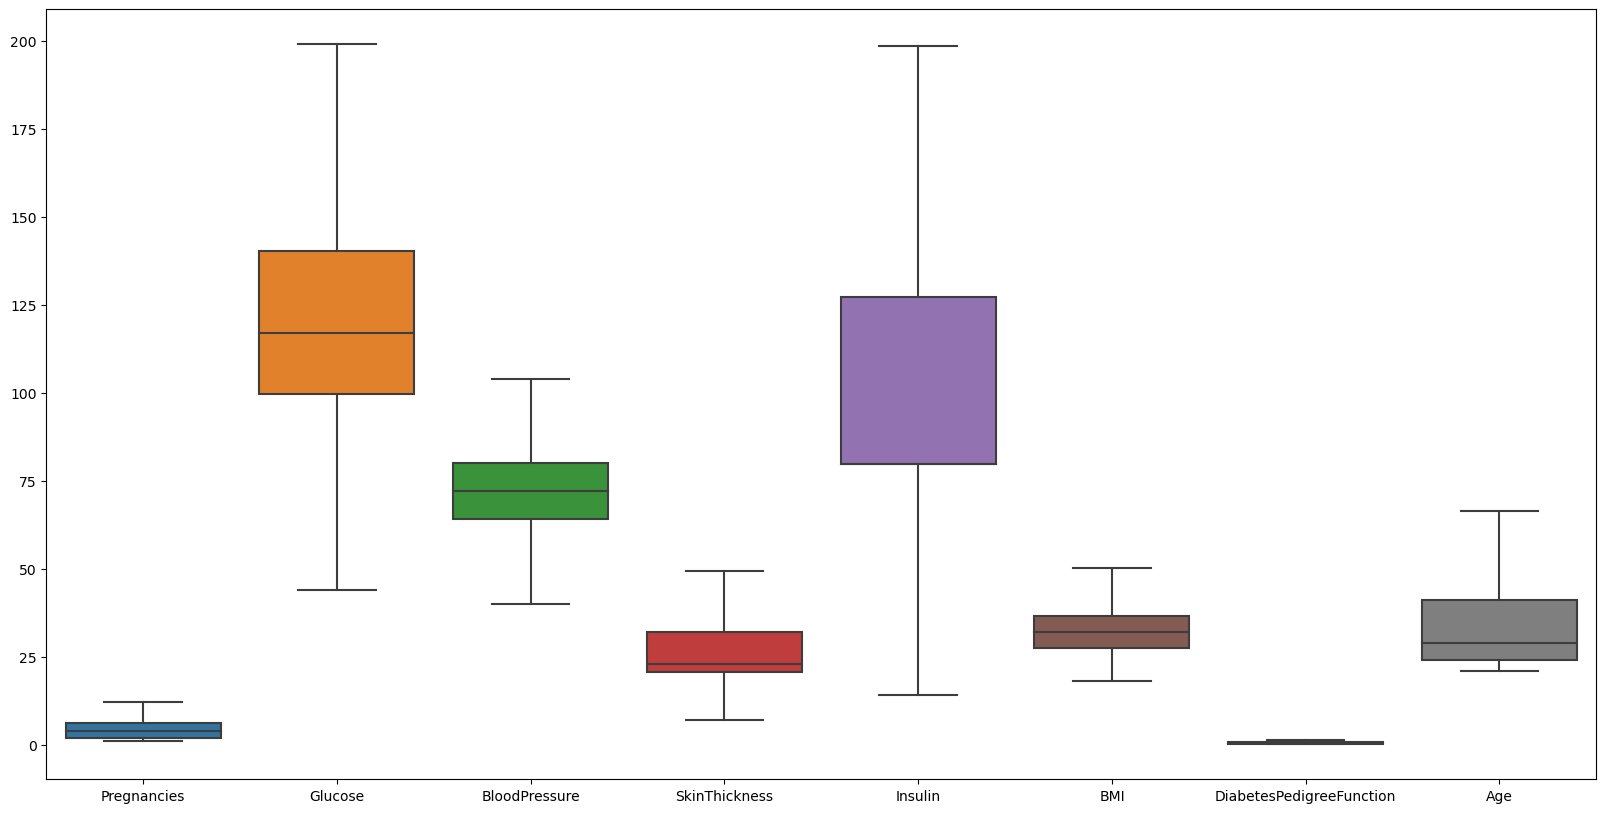

In [31]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=DAT, width=0.8, ax=ax, fliersize=5)
plt.show()

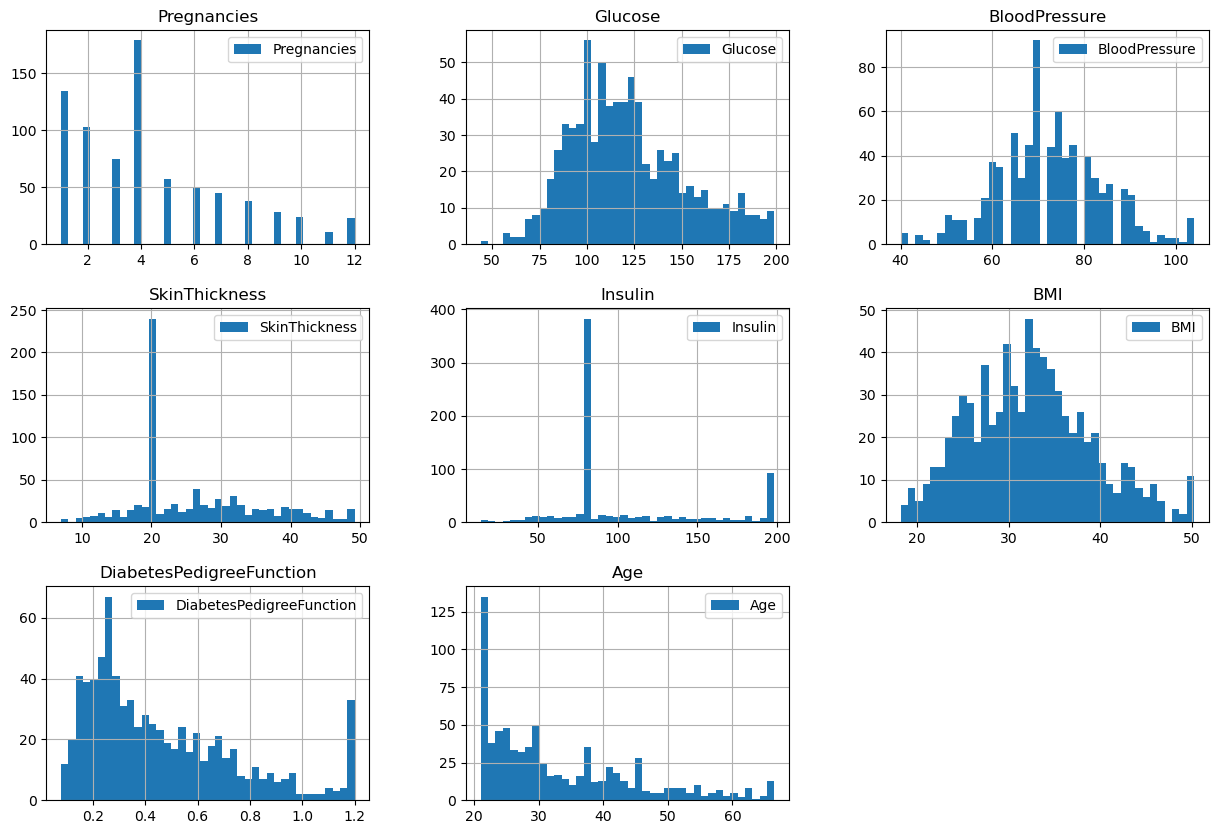

In [32]:
DAT.hist(bins=40, figsize=(15,10), legend=True)
plt.show()

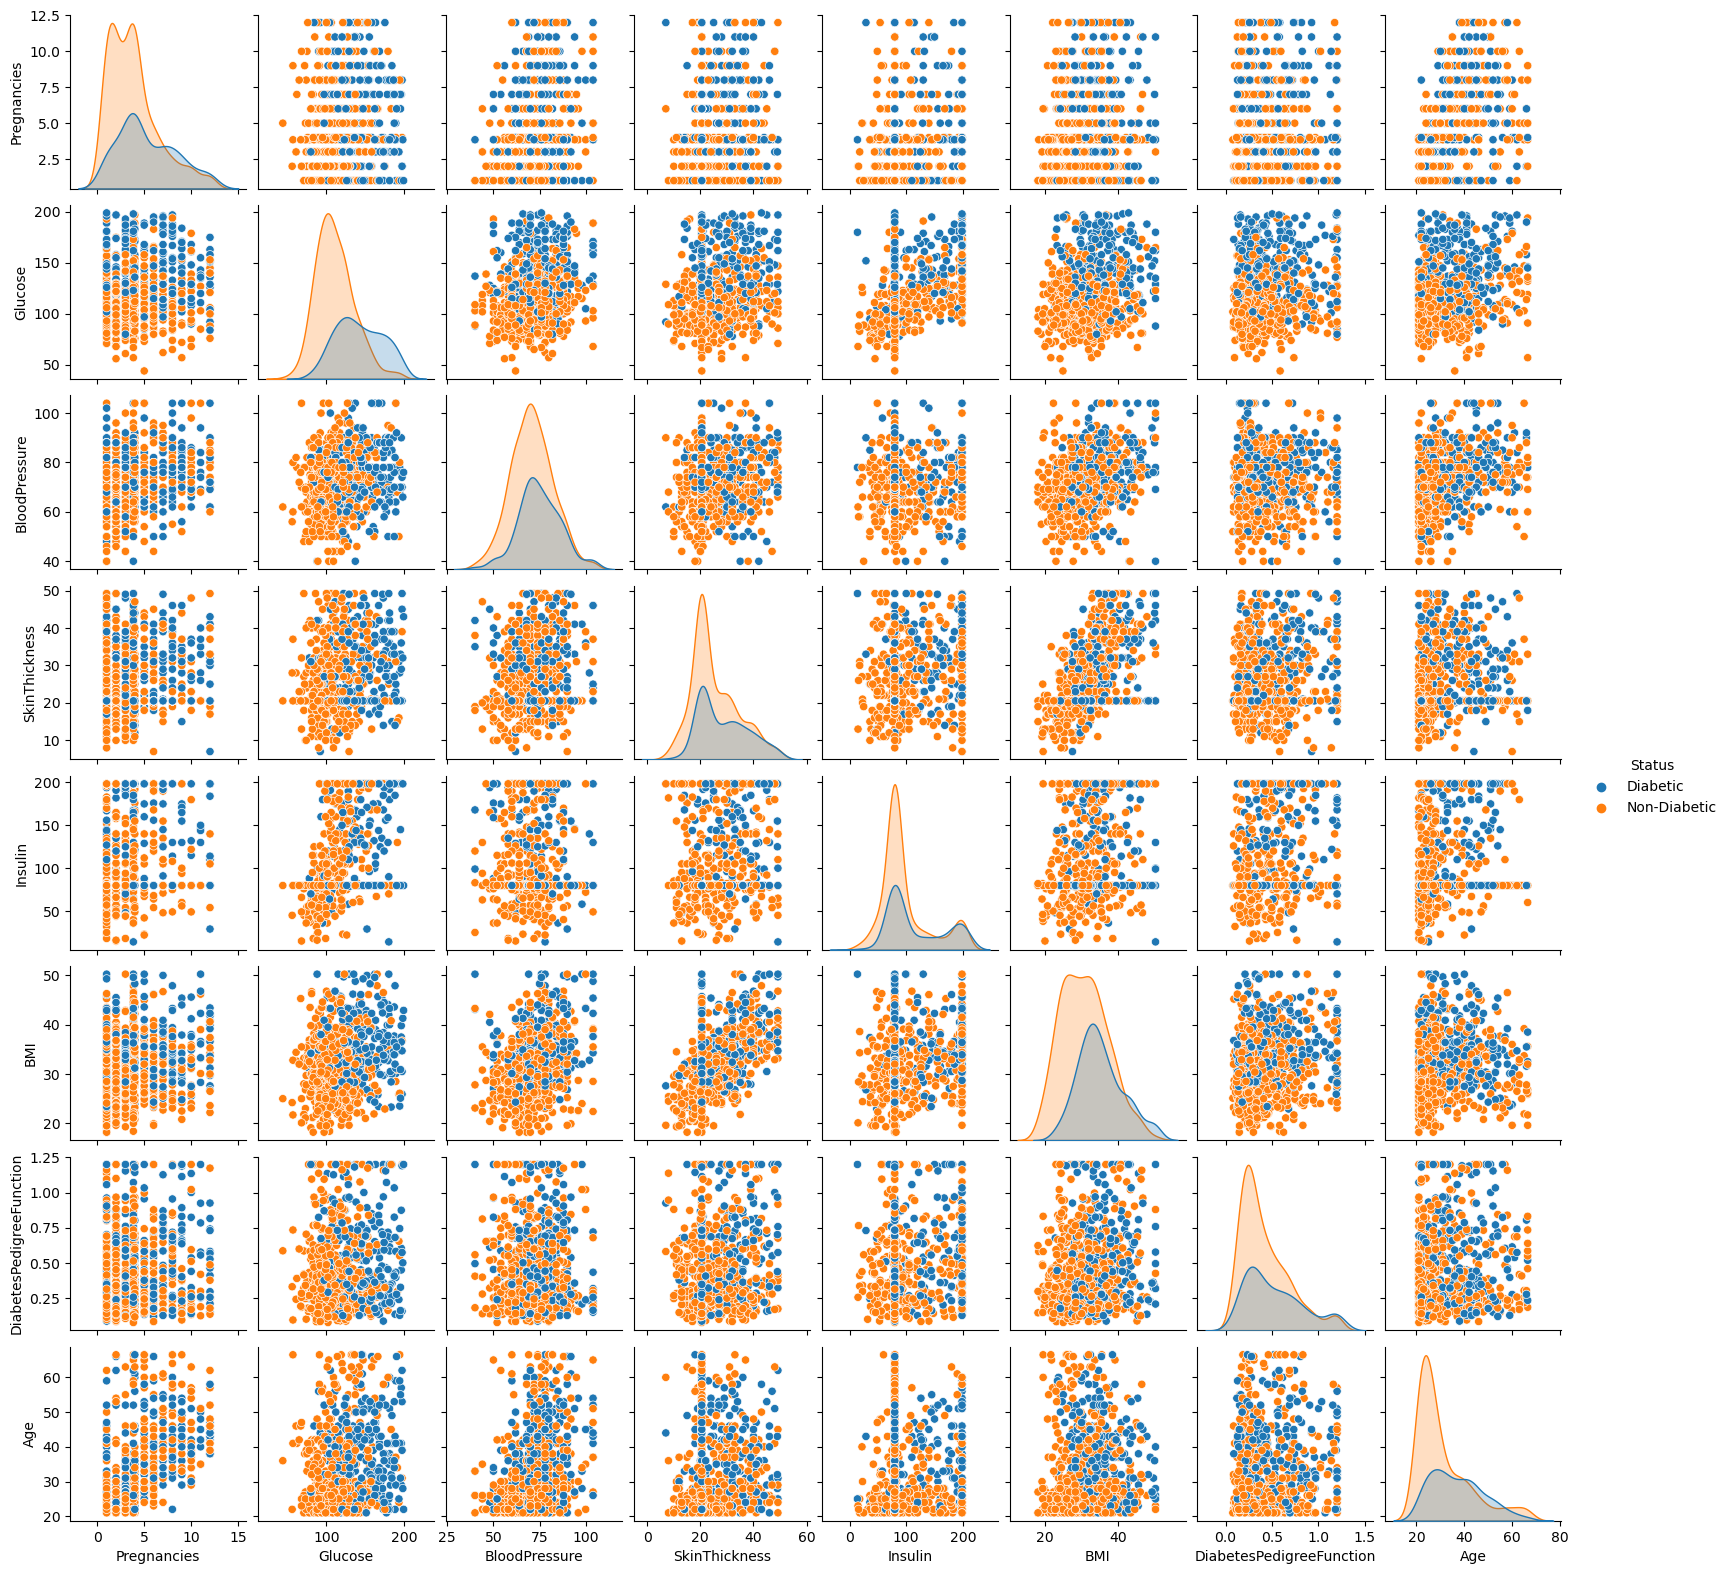

In [33]:
sns.pairplot(data=DAT, height=2, aspect=1, hue='Status')
plt.show()

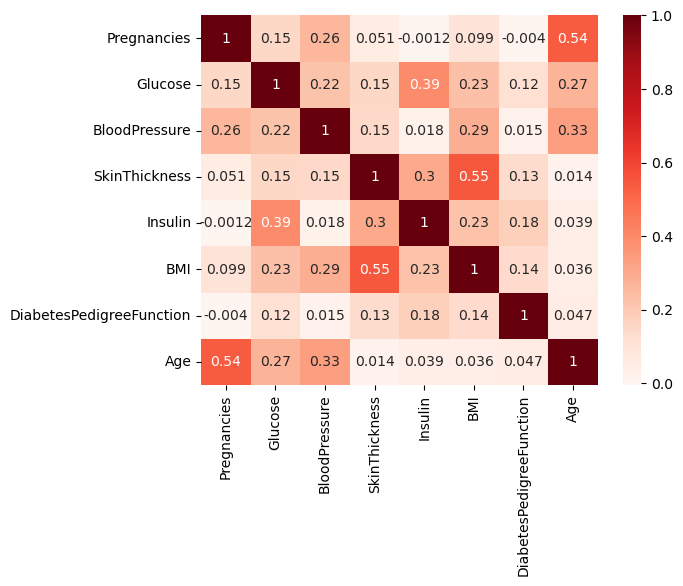

In [34]:
sns.heatmap(DAT.corr(), annot=True, cmap='Reds')
plt.show()

## Predection Model Training

In [35]:
data = DAT.copy()
x = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = data['Status']

In [36]:
SEED = 20
np.random.seed(SEED)
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = SEED, test_size = 0.25, stratify = y)

* We'll divide the subsets between training sets, with 75% of data, and test sets, with 25% of data.

In [37]:
# Linear Support Vector Classifier Model
SVC = LinearSVC(dual=False)
SVC.fit(x_train, y_train)

y_pred = SVC.predict(x_test)
print(classification_report(y_test, y_pred, target_names=["Non-Diabetic", "Diabetic"]))

f1_diabetic = f1_score(y_test, y_pred, pos_label='Diabetic') * 100
print('F1-score for Diabetic class: %.2f%%' % f1_diabetic)
f1_non_diabetic = f1_score(y_test, y_pred, pos_label='Non-Diabetic') * 100
print('F1-score for Non-Diabetic class: %.2f%%' % f1_non_diabetic)

print('Accuracy: ', SVC.score(x_test, y_test)*100,"%")

              precision    recall  f1-score   support

Non-Diabetic       0.81      0.66      0.73        67
    Diabetic       0.83      0.92      0.87       125

    accuracy                           0.83       192
   macro avg       0.82      0.79      0.80       192
weighted avg       0.83      0.83      0.82       192

F1-score for Diabetic class: 72.73%
F1-score for Non-Diabetic class: 87.45%
Accuracy:  82.8125 %


* The [Linear Support Vector Classifier (SVC) method](https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python) is a linear kernel function that can be used to classify samples.
We think it will be suitable to predict the odds of the patients's outcomes.

In [38]:
# Logistic Regression Model
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred, target_names=["Non-Diabetic", "Diabetic"]))

f1_diabetic = f1_score(y_test, y_pred, pos_label='Diabetic') * 100
print('F1-score for Diabetic class: %.2f%%' % f1_diabetic)
f1_non_diabetic = f1_score(y_test, y_pred, pos_label='Non-Diabetic') * 100
print('F1-score for Non-Diabetic class: %.2f%%' % f1_non_diabetic)

print('Accuracy: ', lr.score(x_test, y_test)*100,"%")

              precision    recall  f1-score   support

Non-Diabetic       0.80      0.67      0.73        67
    Diabetic       0.84      0.91      0.87       125

    accuracy                           0.83       192
   macro avg       0.82      0.79      0.80       192
weighted avg       0.83      0.83      0.82       192

F1-score for Diabetic class: 73.17%
F1-score for Non-Diabetic class: 87.36%
Accuracy:  82.8125 %


In [39]:
# Decision Tree Model
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)
print(classification_report(y_test, y_pred, target_names=["Non-Diabetic", "Diabetic"]))

f1_diabetic = f1_score(y_test, y_pred, pos_label='Diabetic') * 100
print('F1-score for Diabetic class: %.2f%%' % f1_diabetic)
f1_non_diabetic = f1_score(y_test, y_pred, pos_label='Non-Diabetic') * 100
print('F1-score for Non-Diabetic class: %.2f%%' % f1_non_diabetic)


print('Accuracy: ', dtc.score(x_test, y_test)*100,"%")

              precision    recall  f1-score   support

Non-Diabetic       0.56      0.60      0.58        67
    Diabetic       0.78      0.75      0.76       125

    accuracy                           0.70       192
   macro avg       0.67      0.67      0.67       192
weighted avg       0.70      0.70      0.70       192

F1-score for Diabetic class: 57.97%
F1-score for Non-Diabetic class: 76.42%
Accuracy:  69.79166666666666 %


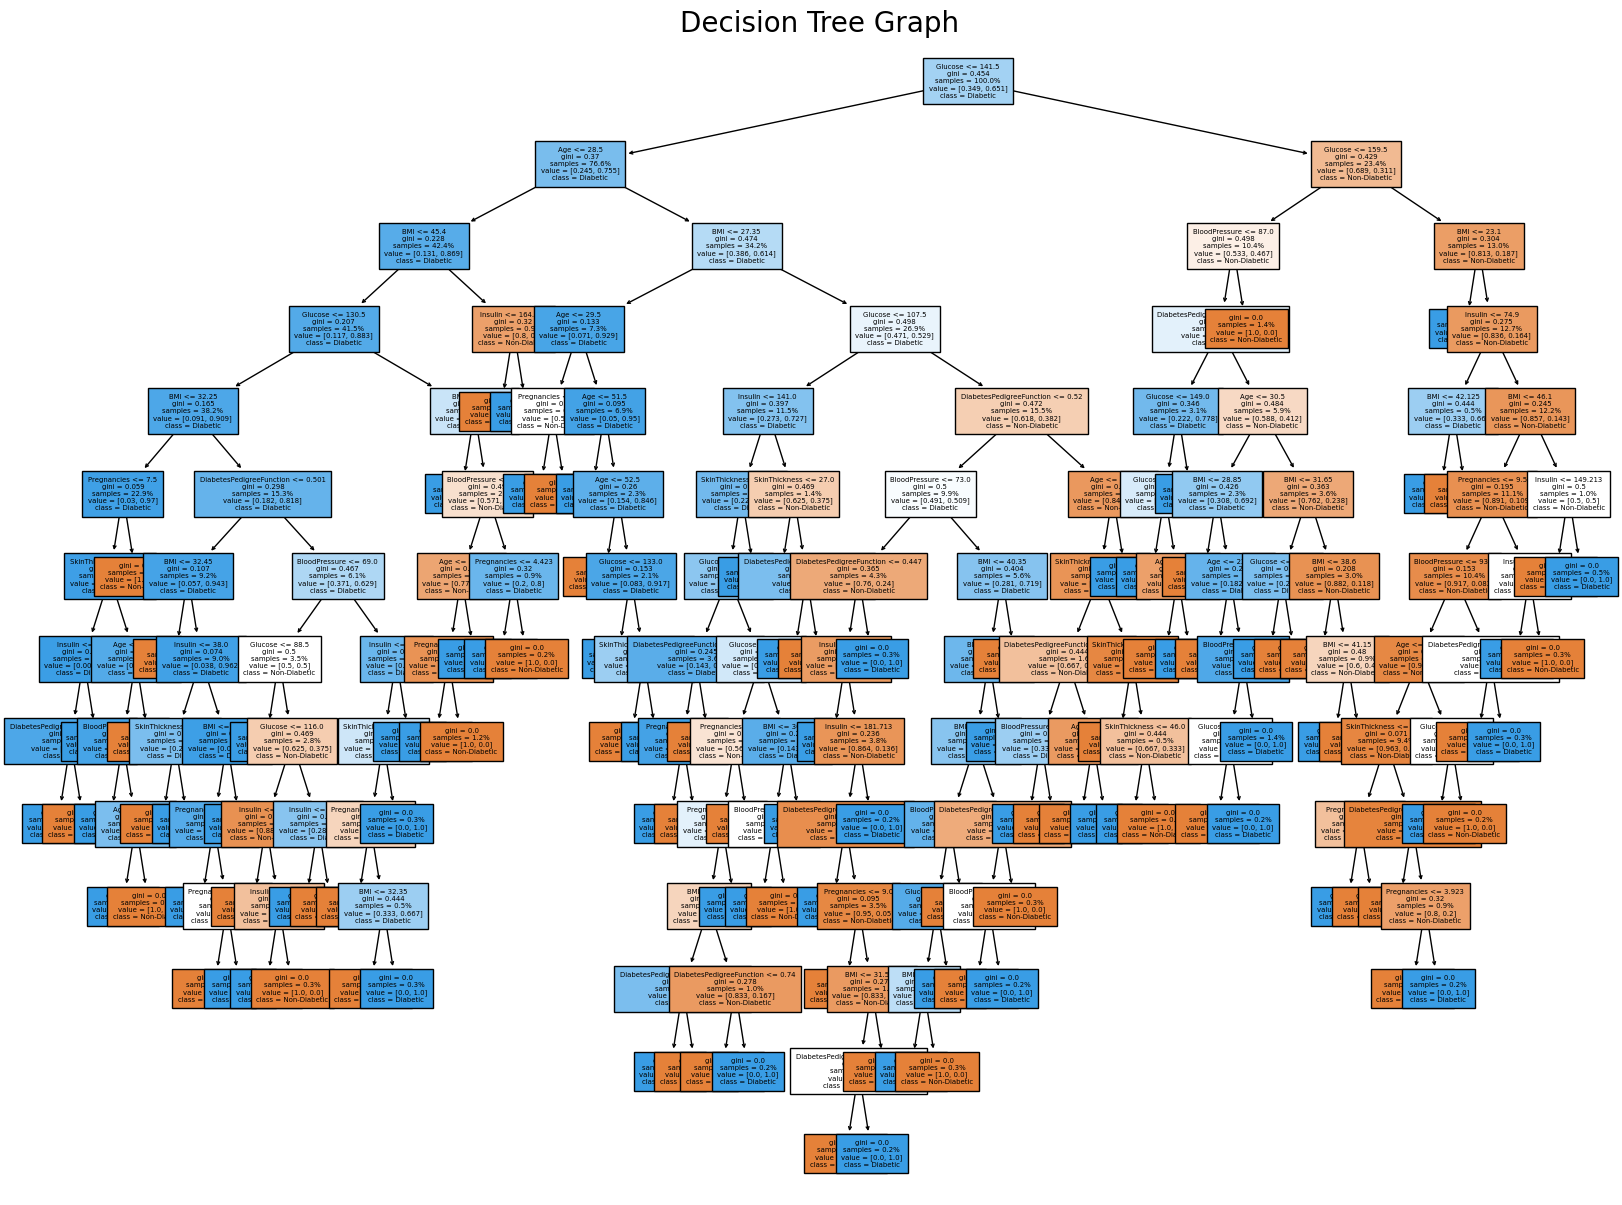

In [40]:
features = x.columns.tolist()
target = y.value_counts().index

plt.figure(figsize=(20, 15))
tree.plot_tree(dtc, feature_names=features, class_names=target, filled=True, fontsize=5, proportion=True, impurity=True)
plt.title('Decision Tree Graph', fontsize=20)
plt.show()